<a href="https://colab.research.google.com/github/convolutionalNN/Projects-For-Fun/blob/master/Neuroscience/Biologically_Defined_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit**

In [0]:
#######################################################################################
#    ORIGINAL SOURCE CODE:
#    Title: <Simple Neural Network with 1 hidden layer with the number
#    of hidden units as a hyperparameter to calculate the XOR function>
#    Author: <Kitsios Konstantinos>
#    Date: <Nov 10, 2018>
#    Code version: <1.0.1>
#    Availability: <https://github.com/kitsiosk/xor-neural-net/blob/master/neural_net.py>
#
#######################################################################################

**Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Hyperparameters**

In [0]:
n_h = 8
n_x = 8
n_y = 1
r_h = 0.35

threshold_activation = 5 #threshold for activation potential
homeostatic_threshold = 0.999
num_of_iters = 1000
learning_rate = 0.3
potentiation = .0125
depression = -.0045
delta = 0.05

binary1 = 0
binary2 = 1
sequence1 = 4
sequence2 = 6

**Initialization**

In [0]:
#creates array of 8-bit binary sequences (0-191); shape of array is 8x191
X_train = []
for i in range(0,191):
  X_train.append([i])
X_train = np.array(X_train, dtype=np.uint8)
X_train = np.unpackbits(X_train, axis=1)
X_train = np.rot90(X_train, 3)

In [0]:
#creates array of 8-bit binary sequences (192-256) shape of array is 8x64
X_test = []
for i in range(192,256):
  X_test.append([i])
X_test = np.array(X_test, dtype=np.uint8)
X_test = np.unpackbits(X_test, axis=1)
X_test = np.rot90(X_test, 3)

In [0]:
#label each training binary sequence with 1 or 0 based on arbitrary rule (i.e. 1 if 5th digit is a 0 and 7th digit is a 1; else 0)
Y_train = []
for i in range(0,191):
  if(X_train[sequence1][i] == binary1 and X_train[sequence2][i] == binary2):
    Y_train.append(1)
  else:
    Y_train.append(0)

In [0]:
#same for test
Y_test = []
for i in range(0, 63):
  if(X_test[sequence1][i] == binary1 and X_test[sequence2][i] == binary2):
    Y_test.append(1)
  else:
    Y_test.append(0)

Cost after iteration# 0: 0.693147
Cost after iteration# 10: 0.491728
Cost after iteration# 20: 0.287929
Cost after iteration# 30: 0.157815
Cost after iteration# 40: 0.041871
Cost after iteration# 50: 0.025886
Cost after iteration# 60: 0.022493
Cost after iteration# 70: 0.009463
Cost after iteration# 80: 0.008281
Cost after iteration# 90: 0.005966
Cost after iteration# 100: 0.006242
Cost after iteration# 110: 0.002998
Cost after iteration# 120: 0.002959
Cost after iteration# 130: 0.002847
Cost after iteration# 140: 0.002459
Cost after iteration# 150: 0.002106
Cost after iteration# 160: 0.002024
Cost after iteration# 170: 0.001982
Cost after iteration# 180: 0.001666
Cost after iteration# 190: 0.001637
Cost after iteration# 200: 0.001611
Cost after iteration# 210: 0.001585
Cost after iteration# 220: 0.001560
Cost after iteration# 230: 0.001521
Cost after iteration# 240: 0.001498
Cost after iteration# 250: 0.001476
Cost after iteration# 260: 0.001455
Cost after iteration# 270: 0.001434
Cos

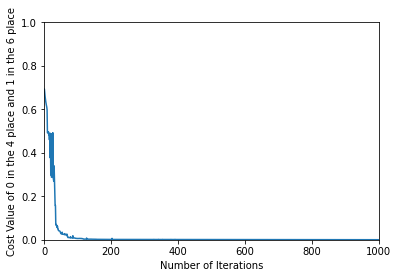

In [0]:
#initialize for LTPD function
R0_factor = []
R1_factor = []
R2_factor = []
R3_factor = []
R1_previous = []
R2_previous = []
R3_previous = []

X = X_train #8x191
Y = np.array(Y_train) #1x191

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y, r_h):
    global R0, R1, R2, R3
    
    W1 = np.random.randn(n_h, n_x) #8x8
    b1 = np.zeros((n_h, n_y)) #8x1
    W2 = np.random.randn(n_h, n_x) #8x8
    b2 = np.zeros((n_h, n_y)) #8x1
    W3 = np.random.randn(n_h, n_x) #8x8
    b3 = np.zeros((n_h, n_y)) #8x1
    W4 = np.random.randn(n_y, n_x) #1x8
    b4 = np.zeros((n_y, n_y)) #1x1
    R0 = np.full((n_h, np.shape(X)[1]), r_h) #8x191
    R1 = np.full((n_h, np.shape(X)[1]), r_h) #8x191
    R2 = np.full((n_h, np.shape(X)[1]), r_h) #8x191
    R3 = np.full((n_h, np.shape(X)[1]), r_h) #8x191

    #initialize parameters
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3,
        "W4": W4,
        "b4": b4,
    }
    return parameters

#depending on the length of the columns of W (n), each element in A will become an array of 1xn
#this would turn a 8x191 array corresponding with 8x8 array into a 8x191x8 array
def split(A,W):
  A_new = []
  for x in range(np.shape(A)[0]):
    store = []
    for y in range(np.shape(A)[1]): 
      keep = []
      for i in range(np.shape(W)[0]):
        keep.append(A[x][y])
      store.append(keep)
    A_new.append(store)
  A = A_new
  return A

#essentially the dot product for a 3 dimensional array; yields the same shape as a dot product would
def R_dot(A, W):  
  new_Z = []
  for y in range(np.shape(A)[1]):
    Z_sum = []
    for x in range(np.shape(A)[0]):  
      Z = np.multiply(A[x][y], np.transpose(W)[x]) #hadamard product
      Z_sum.append(Z)
    new_Z.append(np.sum(Z_sum, axis=0)) #sum all numbers in each column
  Z = new_Z
  Z = np.squeeze(Z).tolist()
  Z = np.transpose(Z)
  return Z

def forward_prop(X, parameters):

    global R0_factor, R1_factor, R2_factor, R3_factor, R1_previous, R2_previous, R3_previous, R0, R1, R2, R3, OX, OA1, OA2, OA3, A3
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    OX = X
    X = split(X, W1)
    if(i == 0):
      R0 = split(R0, W1)
    neurotransmitter(X, R0)
    R0_factor = []
    LTPD(X, R0, R0_factor)
    R0 = homeostatic(R0)
    Z1 = R_dot(X, W1) + b1
    activation(Z1)
    A1 = np.tanh(Z1)
    
    OA1 = A1
    A1 = split(A1, W2)
    if(i == 0):
      R1 = split(R1, W2)
    neurotransmitter(A1, R1)
    R1_factor = []
    LTPD(A1, R1, R1_factor)
    R1 = homeostatic(R1)
    Z2 = R_dot(A1, W2) + b2
    activation(Z2)
    A2 = np.tanh(Z2)



    OA2 = A2
    A2 = split(A2, W2)
    if(i == 0):
      R2 = split(R2, W2)
    neurotransmitter(A2, R2)
    R2_factor = []
    LTPD(A2, R2, R2_factor)
    R2 = homeostatic(R2)
    Z3 = R_dot(A2, W3) + b3
    activation(Z3)
    A3 = np.tanh(Z3)

    OA3 = A3
    A3 = split(A3, W4)
    if(i == 0):
      R3 = split(R3, W4)
    
    R3 = neurotransmitter(A3, R3)
    R3_factor = []
    LTPD(A3, R3, R3_factor)
    R3 = homeostatic(R3)

    A3 = np.array(A3)[:, :, 0]
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)

    cache = {
        "A1": A1,
        "A2": A2,
        "A3": A3,
        "A4": A4
    }
    return A4, cache

def neurotransmitter(A, R):  
  if(np.shape(A)[2]>1):
    A = np.transpose(A)
    for x in range(np.shape(A)[0]):
      for y in range(np.shape(A)[1]):
        for z in range(np.shape(A)[2]):
          if(A[x][y][z] > R[x][y][z]):
            A[x][y][z] = R[x][y][z]
          elif(A[x][y][z] < -R[x][y][z]):
            A[x][y][z] = -R[x][y][z]
    A = np.transpose(A)
    return R
  else:
    A = np.array(A)
    R = np.array(R)
    A[:, :, 0]
    R[:, :, 0]
    A = np.transpose(A)
    for x in range(np.shape(A)[0]):
      for y in range(np.shape(A)[1]):
        if(A[x][y].any() > R[x][y].any()): #
          A[x][y] = R[x][y]
        elif(A[x][y].any() < -1 * R[x][y].any()):
          A[x][y] = -1 * R[x][y]
    A = np.transpose(A)
    return R

#if Z < threshold, it should = 0
def activation(Z):
  for x in range(np.shape(Z)[0]):
    for y in range(np.shape(Z)[1]): 
      if(np.abs(Z[x][y]) < threshold_activation):
        Z[x][y] = 0

#when element in A==0, corresponding R element subtract small amount (depression)
#when element in A!=0, corresponding R element add small amount (potentiation)
def LTPD(A, R, R_factor):
  for x in range(np.shape(A)[0]):
    factor2 = []
    for y in range(np.shape(A)[1]):  
      factor1 = []
      for z in range(np.shape(A)[2]):  
        if(A[x][y][z] == 0):
          factor1.append(depression)
        else:
          factor1.append(potentiation)
      factor2.append(factor1)   
    R_factor.append(factor2)
  R = np.transpose(R_factor) + R
  for x in range(np.shape(R)[0]):
    for y in range(np.shape(R)[1]):  
      for z in range(np.shape(R)[2]):
        if(R[x][y][z] < 0):
          R[x][y][z] = 0
  return R

def homeostatic(R):
  for x in range(np.shape(R)[0]):
    for y in range(np.shape(R)[1]):
      if(np.amax(R[x][y]) > homeostatic_threshold and np.amax(R[x][y]) > np.abs(np.amin(R[x][y]))):
        R[x][y] = R[x][y] - delta * (R[x][y] / (np.amax(R[x][y]) / homeostatic_threshold))
      elif(np.amin(R[x][y]) < -homeostatic_threshold and np.abs(np.amin(R[x][y])) > np.amax(R[x][y])):
        R[x][y] = R[x][y] - delta * (R[x][y] / (np.amin(R[x][y]) / homeostatic_threshold))
  return R


def calculate_cost(A4, Y):
    cost = -np.sum(np.multiply(Y, np.log(A4)) +  np.multiply(1-Y, np.log(1-A4)))/m
    cost = np.squeeze(cost)
    return cost

def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    A4 = cache["A4"]

    W4 = parameters["W4"]
    W3 = parameters["W3"]
    W2 = parameters["W2"]

    dZ4 = A4 - Y
    dW4 = np.dot(dZ4, np.array(OA3).T)/m
    db4 = np.sum(dZ4, axis=1, keepdims=True)/m
    dZ3 = np.multiply(np.dot(W4.T, dZ4), 1-np.power(OA3, 2))
    dW3 = np.dot(dZ3, OA2.T)/m
    db3 = np.sum(dZ3, axis=1, keepdims=True)/m
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1-np.power(OA2, 2))
    dW2 = np.dot(dZ2, OA1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(OA1, 2))
    dW1 = np.dot(dZ1, OX.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
        "dW3": dW3,
        "db3": db3,
        "dW4": dW4,
        "db4": db4
    }

    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2,
        "W3": W3,
        "W4": W4,
        "b3" : b3,
        "b4" : b4
    }

    return new_parameters


def model(X, Y, n_x, n_h, n_y, r_h, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y, r_h)

    costs = [] #ADDED

    global i

    for i in range(0, num_of_iters+1):
        a4, cache = forward_prop(X, parameters)

        cost = calculate_cost(a4, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        costs.append(cost) #ADDED

        if(i%10 == 0):
           costs.append(cost)
           print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    plt.plot(costs)
    plt.ylabel('Cost Value of ' + x)
    plt.xlabel('Number of Iterations')
    plt.axis([0, 1000, 0, 1])


    return parameters

def predict(X, parameters):
    a4, cache = forward_prop(X, parameters)
    yhat = a4
    yhat = np.squeeze(yhat)
    y_predict = yhat
    return y_predict

np.random.seed(2)

# No. of training examples
m = X.shape[1]

x = str(binary1) + ' in the ' + str(sequence1) + ' place and ' + str(binary2) + ' in the ' + str(sequence2) + ' place'

#train model
trained_parameters = model(X, Y, n_x, n_h, n_y, r_h, num_of_iters, learning_rate)